# Spam filter by SVM and Cross Validation

First import the required libraries including scikit-learn, and preprocess data.

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt(fname = 'spambase-1.data.shuffled.txt', delimiter = ',' )
data_train = data[0:3000]
data_test = data[3001:4601]
Xtrain = data_train[:,0:-1]
ytrain = data_train[:,-1]
Xtest = data_test[:,0:-1]
ytest = data_test[:,-1]

The cross_val_score function from scikit-learn is used for 10-fold cross validation. Adding the standard scaler to the pipeline is shown to improve computational speed significantly.

In [12]:
def cross_valudation(Xtrain, ytrain, d, k):
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "poly", degree = d, coef0 =1, \
                        C = np.float64(2) ** np.float64(k)))
    ])
    #poly_kernel_svm_clf = SVC(kernel = "poly", degree = d, coef0 =1, C = np.float64(2) ** np.float64(k))
    scores = cross_val_score(poly_kernel_svm_clf, Xtrain, ytrain, cv = 10)
    avg_err = 1-scores.mean()
    return avg_err

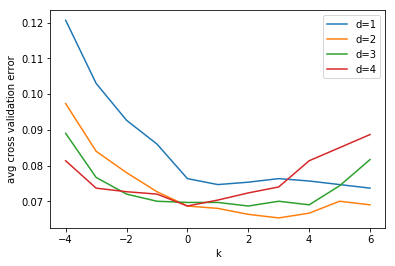

In [4]:
%matplotlib inline
fig=plt.figure()
for d in range(1,5):
    avg_err = []
    for k in range(-4,7):
        avg_err.append(cross_valudation(Xtrain, ytrain, d, k))
    plt.plot(range(-4,7), avg_err, label='d='+str(d))

plt.legend()
plt.xlabel('k')
plt.ylabel('avg cross validation error')
plt.show()

Results show that the best pair of $(C^\ast,d^\ast)$ is $(2^2, 2)$, so now fix $C = 4$ and compare the average corss-validation error and test error for various $d$.

In [5]:
kf = KFold(n_splits = 10)

k = 2
avg_cv_err_list = []
test_err_list = []
for d in range(1,5):
    err = []
    max_score = 0.0;
    for train_index, test_index in kf.split(Xtrain):
        X_cv_train, X_cv_test = Xtrain[train_index], Xtrain[test_index]
        y_cv_train, y_cv_test = ytrain[train_index], ytrain[test_index]
        poly_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel = "poly", degree = d, coef0 =1, \
                            C = np.float64(2) ** np.float64(k)))
        ])
        poly_kernel_svm_clf.fit(X_cv_train, y_cv_train)
        score = poly_kernel_svm_clf.score(X_cv_test, y_cv_test)
        err.append(1-score)
        if (score > max_score):
            cv_poly_kernel_svm_clf = poly_kernel_svm_clf
    
    avg_err = sum(err)/len(err)
    avg_cv_err_list.append(avg_err)
    test_err_list.append(1 - cv_poly_kernel_svm_clf.score(Xtest,ytest))

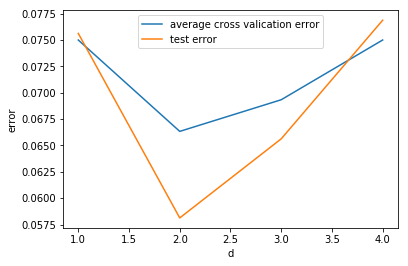

In [11]:
plt.plot(range(1,5), avg_cv_err_list, label='average cross valication error')
plt.plot(range(1,5), test_err_list, label='test error')
plt.legend()
plt.xlabel('d')
plt.ylabel('error')
plt.show()

Results show that with $d=2$, the average corss validation error and the test error are both smaller than the other choice of $d$.